In [1]:
from pathlib import Path
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

np.set_printoptions(suppress=True)

pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.options.display.max_colwidth = None

In [2]:
path1 = Path(r"A:\Workspace\Python\Masterarbeit\Kaggle Home Credit Datensatz")
path2 = Path(r"C:\Users\rober\Documents\Workspace\Python\Masterarbeit\Kaggle Home Credit Datensatz")

if path1.is_dir():
    DATASET_DIR = path1
else:
    DATASET_DIR = path2

In [3]:
app_test = pd.read_csv(DATASET_DIR / "application_test.csv")
app_train = pd.read_csv(DATASET_DIR / "application_train.csv")

In [4]:
app_train["TARGET"].replace(
    {
        0: "Payback",
        1: "Default"
    }, inplace = True
)

In [5]:
n_heads = ['TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']
m_heads = ['CNT_CHILDREN','AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'CNT_FAM_MEMBERS', 'HOUR_APPR_PROCESS_START', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI', 'TOTALAREA_MODE', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']
md_heads = ['CNT_CHILDREN', "CNT_FAM_MEMBERS","HOUR_APPR_PROCESS_START", "OBS_30_CNT_SOCIAL_CIRCLE","DEF_30_CNT_SOCIAL_CIRCLE", "OBS_60_CNT_SOCIAL_CIRCLE", "DEF_60_CNT_SOCIAL_CIRCLE","AMT_REQ_CREDIT_BUREAU_HOUR","AMT_REQ_CREDIT_BUREAU_DAY","AMT_REQ_CREDIT_BUREAU_WEEK","AMT_REQ_CREDIT_BUREAU_MON","AMT_REQ_CREDIT_BUREAU_QRT","AMT_REQ_CREDIT_BUREAU_YEAR"]
ms_heads = [head for head in m_heads if head not in md_heads]

In [6]:
payback = app_train[app_train["TARGET"] == "Payback"]
default = app_train[app_train["TARGET"] == "Default"]
m = app_train[m_heads]
n = app_train[n_heads]

md = m[md_heads]
mdp = md[app_train["TARGET"] == "Payback"]
mdd = md[app_train["TARGET"] == "Default"]

ms = m[ms_heads]
msp = ms[app_train["TARGET"] == "Payback"]
msd = ms[app_train["TARGET"] == "Default"]

In [7]:
# Test Datenbereinigung
# Verbesserung der Prognosegenauigkeit von 0.7465 auf 0.7501
mode = [head for head in m_heads if "MODE" in head]
medi = [head for head in m_heads if "MEDI" in head]
app_train = app_train.drop(mode + medi, axis=1)

andere = ["REGION_RATING_CLIENT_W_CITY", "LIVE_REGION_NOT_WORK_REGION"]
for head in andere:
    n_heads.remove(head)
app_train = app_train.drop(andere, axis=1)

In [8]:
# transformiert kategorische variablen in integer
for head in n_heads:
    app_train[head], cats = pd.factorize(app_train[head])

In [9]:
y = app_train["TARGET"]
x = app_train.drop(["SK_ID_CURR", "TARGET"], axis=1)

In [10]:
# ersätzt alle np.nan durch 0
x = x.fillna(0)

In [11]:
# unterteilt den trainingsdatensatz in trainings- und validierungsdatensätze
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.5, random_state=0)

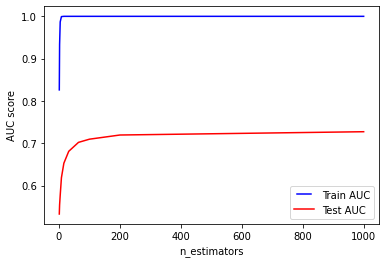

In [26]:
n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200, 1000]
train_results = []
test_results = []

for estimator in n_estimators:
    rf = RandomForestClassifier(n_estimators=estimator, n_jobs=-1)
    rf.fit(x_train, y_train)
    
    x_train_prob = rf.predict_proba(x_train)
    prob = x_train_prob[:,1]
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, prob)
    roc_auc = roc_auc_score(y_train, prob)
    train_results.append(roc_auc)
    
    x_test_prob = rf.predict_proba(x_test)
    prob = x_test_prob[:,1]
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, prob)
    roc_auc = roc_auc_score(y_test, prob)
    test_results.append(roc_auc)
    
from matplotlib.legend_handler import HandlerLine2D

line1, = plt.plot(n_estimators, train_results, "b", label="Train AUC")
line2, = plt.plot(n_estimators, test_results, "r", label="Test AUC")

plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("AUC score")
plt.xlabel("n_estimators")
plt.show()

In [27]:
for idx, result in enumerate(test_results):
    try:
        print(test_results[idx+1] - result)
    except IndexError:
        pass

0.021501360683604642
0.02270353385570001
0.04154451668614667
0.0342999142564443
0.028124758287427887
0.021120683732063883
0.007533281328373276
0.009860065534485485
0.007772348082356273


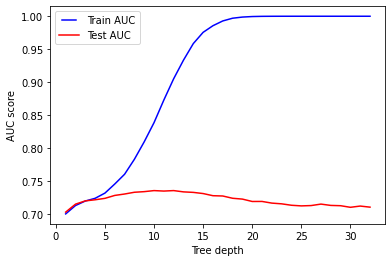

In [25]:
max_depths = np.linspace(1, 32, 32, endpoint=True)

train_results = []
test_results = []

for max_depth in max_depths:
    rf = RandomForestClassifier(max_depth=max_depth, n_jobs=-1)
    rf.fit(x_train, y_train)
    
    x_train_prob = rf.predict_proba(x_train)
    prob = x_train_prob[:,1]
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, prob)
    roc_auc = roc_auc_score(y_train, prob)
    train_results.append(roc_auc)
    
    x_test_prob = rf.predict_proba(x_test)
    prob = x_test_prob[:,1]
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, prob)
    roc_auc = roc_auc_score(y_test, prob)
    test_results.append(roc_auc)
    
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, "b", label="Train AUC")
line2, = plt.plot(max_depths, test_results, "r", label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("AUC score")
plt.xlabel("Tree depth")
plt.show()

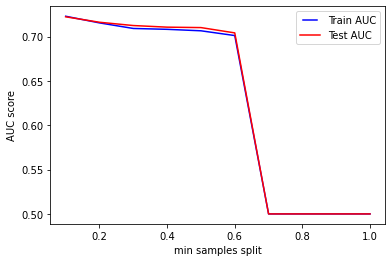

In [29]:
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)

train_results = []
test_results = []

for min_samples_split in min_samples_splits:
    rf = RandomForestClassifier(min_samples_split=min_samples_split)
    rf.fit(x_train, y_train)
    
    x_train_prob = rf.predict_proba(x_train)
    prob = x_train_prob[:,1]
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, prob)
    roc_auc = roc_auc_score(y_train, prob)
    train_results.append(roc_auc)
    
    x_test_prob = rf.predict_proba(x_test)
    prob = x_test_prob[:,1]
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, prob)
    roc_auc = roc_auc_score(y_test, prob)
    test_results.append(roc_auc)
    
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_splits, train_results, "b", label="Train AUC")
line2, = plt.plot(min_samples_splits, test_results, "r", label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("AUC score")
plt.xlabel("min samples split")
plt.show()

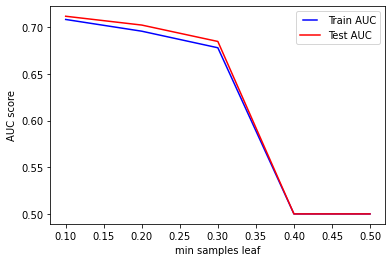

In [30]:
min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True)

train_results = []
test_results = []

for min_samples_leaf in min_samples_leafs:
    rf = RandomForestClassifier(min_samples_leaf=min_samples_leaf)
    rf.fit(x_train, y_train)
    
    x_train_prob = rf.predict_proba(x_train)
    prob = x_train_prob[:,1]
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, prob)
    roc_auc = roc_auc_score(y_train, prob)
    train_results.append(roc_auc)
    
    x_test_prob = rf.predict_proba(x_test)
    prob = x_test_prob[:,1]
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, prob)
    roc_auc = roc_auc_score(y_test, prob)
    test_results.append(roc_auc)
    
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_leafs, train_results, "b", label="Train AUC")
line2, = plt.plot(min_samples_leafs, test_results, "r", label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("AUC score")
plt.xlabel("min samples leaf")
plt.show()

In [48]:
[x*10 for x in range(1,10)]

[10, 20, 30, 40, 50, 60, 70, 80, 90]

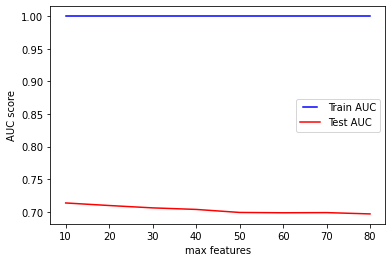

In [50]:
max_features = [x*10 for x in range(1,9)]

train_results = []
test_results = []

for max_feature in max_features:
    rf = RandomForestClassifier(max_features=max_feature)
    rf.fit(x_train, y_train)
    
    x_train_prob = rf.predict_proba(x_train)
    prob = x_train_prob[:,1]
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, prob)
    roc_auc = roc_auc_score(y_train, prob)
    train_results.append(roc_auc)
    
    x_test_prob = rf.predict_proba(x_test)
    prob = x_test_prob[:,1]
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, prob)
    roc_auc = roc_auc_score(y_test, prob)
    test_results.append(roc_auc)
    
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_features, train_results, "b", label="Train AUC")
line2, = plt.plot(max_features, test_results, "r", label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("AUC score")
plt.xlabel("max features")
plt.show()

In [55]:
model = RandomForestClassifier(max_depth=7, random_state=0)
#model = RandomForestClassifier(max_depth=20, random_state=0)

In [56]:
model.fit(x,y)

RandomForestClassifier(max_depth=7, random_state=0)

In [57]:
# Prognosewerte der Testdaten
model.predict(x_test)

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [58]:
# Prognosewerte der Testdaten in %
x_test_prob = model.predict_proba(x_test)
x_test_prob

array([[0.12712216, 0.87287784],
       [0.03965774, 0.96034226],
       [0.06644202, 0.93355798],
       ...,
       [0.07624964, 0.92375036],
       [0.06882623, 0.93117377],
       [0.08989812, 0.91010188]])

In [59]:
# Durchschnittliche Trefferwahrscheinlichkeit
model.score(x_test, y_test)

0.919424282629621

In [60]:
# Erstellung der AUC & ROC-Metrik
# Wahrscheinlichkeiten für keinen Kreditausfall
prob = x_test_prob[:,1]
auc = roc_auc_score(y_test, prob)
print(auc)
# FalsePositiveRate, TruePositiveRate & Treshold
fpr, tpr, threshold = roc_curve(y_test, prob)

0.7494855353261466


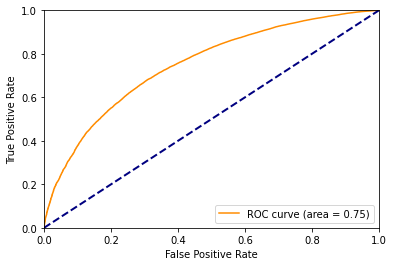

In [61]:
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

In [62]:
# Koeffizienten der einzelnen Klassen
coef_dict = {}
for coef, feat in zip(model.feature_importances_, x.columns.values):
    coef_dict[feat] = coef

In [63]:
# Feature Importance
d = dict(sorted(coef_dict.items(), key=lambda item: item[1], reverse=True))

for i,v in d.items():
    print('Feature: {}, Score: {}'.format(i,v))

Feature: EXT_SOURCE_2, Score: 0.24204957678485034
Feature: EXT_SOURCE_3, Score: 0.22868125230262742
Feature: EXT_SOURCE_1, Score: 0.08068099716664255
Feature: DAYS_BIRTH, Score: 0.047358710179861575
Feature: DAYS_EMPLOYED, Score: 0.03703995043795705
Feature: DAYS_LAST_PHONE_CHANGE, Score: 0.02841198971975304
Feature: AMT_GOODS_PRICE, Score: 0.02550832598904711
Feature: NAME_INCOME_TYPE, Score: 0.024334582423329244
Feature: CODE_GENDER, Score: 0.021222130215209245
Feature: NAME_EDUCATION_TYPE, Score: 0.01900074528012066
Feature: DAYS_ID_PUBLISH, Score: 0.01637233673392316
Feature: AMT_CREDIT, Score: 0.01622063915342858
Feature: REGION_RATING_CLIENT, Score: 0.015977456213839326
Feature: FLAG_DOCUMENT_3, Score: 0.014553486417475994
Feature: REG_CITY_NOT_WORK_CITY, Score: 0.012163641063578683
Feature: LIVINGAREA_AVG, Score: 0.01202947778761725
Feature: FLAG_EMP_PHONE, Score: 0.010808210397037353
Feature: REGION_POPULATION_RELATIVE, Score: 0.00998023902341758
Feature: APARTMENTS_AVG, Score:

<ipython-input-64-10bac31632bc>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(tuple(t.index))


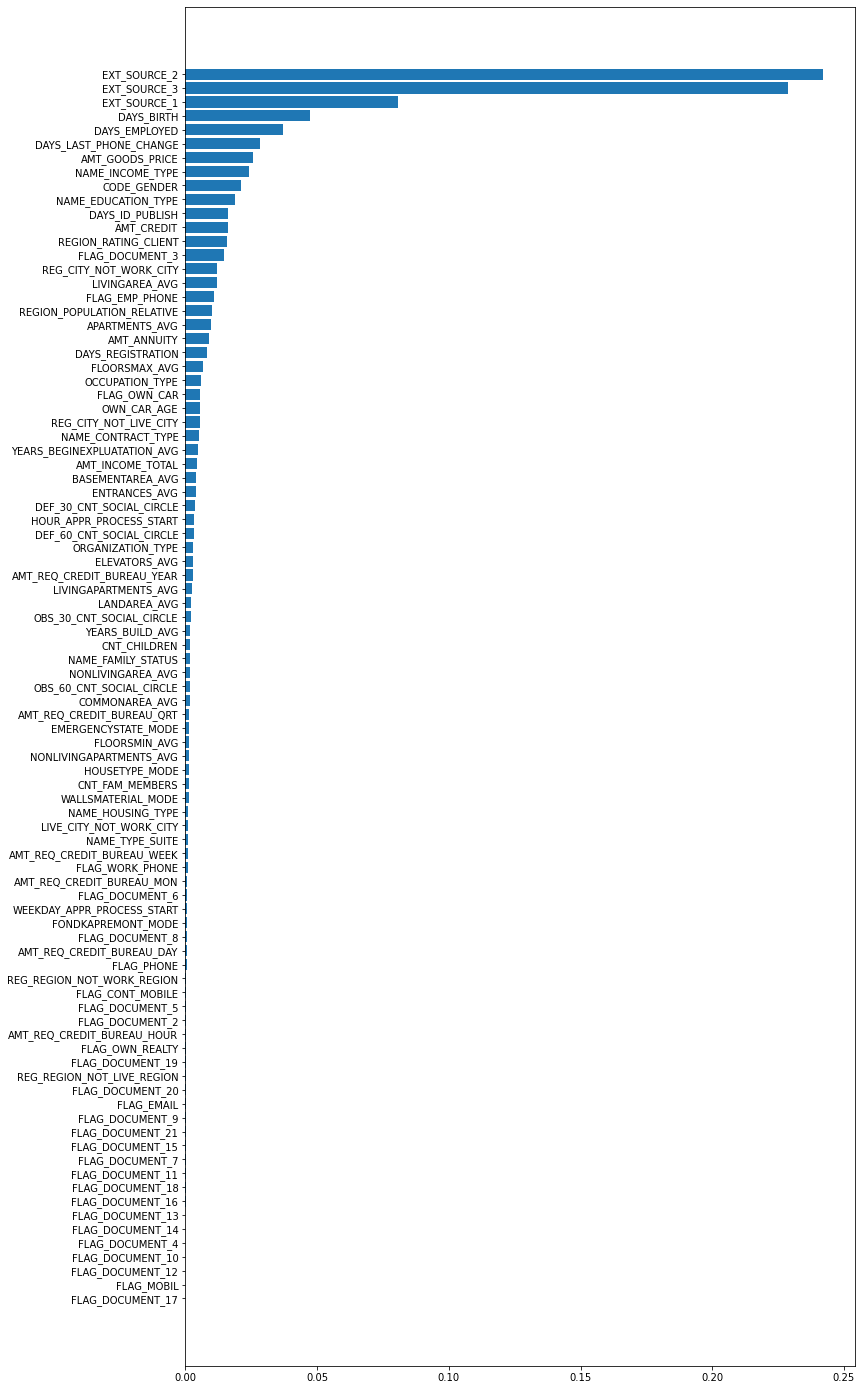

In [64]:
# Feature Importance: Top10 und Bottom10 visualisiert
t = pd.DataFrame.from_dict(d,orient="index",columns=["importance"])
t = t.sort_values(by="importance")
t = np.squeeze(t)

fig, ax = plt.subplots(figsize=(12,25))
ax.barh(t.index, t.values)
ax.set_yticklabels(tuple(t.index))
plt.show()